# Sheet 4

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import random

## 3 QDA
### (a)

In [5]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

pts_class0 = pts[labels == 0]
pts_class1 = pts[labels == 1]

mean_class0 = np.mean(pts_class0)
std_class0 = np.std(pts_class0)
print(f'Class 0: mean {mean_class0:2f}, std {std_class0:2f}')

mean_class1 = np.mean(pts_class1)
std_class1 = np.std(pts_class1)
print(f'Class 1: mean {mean_class1:2f}, std {std_class1:2f}')


Class 0: mean 0.105777, std 1.018518
Class 1: mean 2.105667, std 1.419657


### (b)

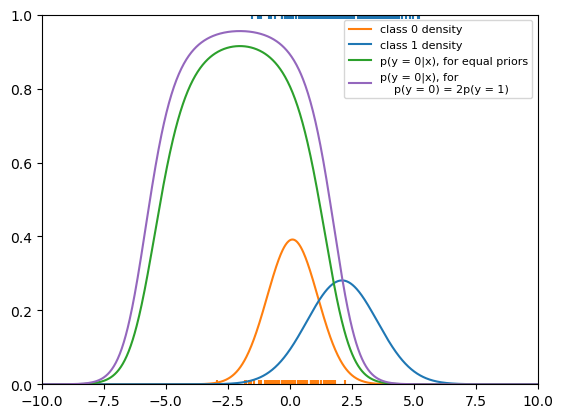

In [ ]:
#fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(0, 1)
ax.scatter(pts_class0, np.zeros(pts_class0.shape), color='C1', marker='|')
ax.scatter(pts_class1, np.ones(pts_class1.shape), marker='|')

xs = np.linspace(-10, 10, 1000)
ys_0 = np.exp(-0.5*((xs - mean_class0)/std_class0)**2) / (std_class0 * np.sqrt(2*np.pi))
ax.plot(xs, ys_0, color='C1', label='class 0 density')
ys_1 = np.exp(-0.5*((xs - mean_class1)/std_class1)**2) / (std_class1 * np.sqrt(2*np.pi))
ax.plot(xs, ys_1, label='class 1 density')

posterior_eq = (0.5*ys_0) / (0.5*ys_0 + 0.5*ys_1)
ax.plot(xs, posterior_eq, color = 'C2', label='p(y = 0|x), for equal priors')

posterior_uneq = (2. * ys_0 / 3.) / (2. * ys_0 / 3. + ys_1 / 3.)
ax.plot(xs, posterior_uneq, color = 'C4', label='p(y = 0|x), for \n    p(y = 0) = 2p(y = 1)')

ax.legend(prop={'size': 8})
plt.show()

The probability p(y = 0|x) is shifted to the left, since the points from class 0 are also more to the left compared to the points from class 1. The highest probability is around the point p=-2.5, where there are no points from class 1 and a bit of of points from class 0. After that the probability starts to decrease, and after it reaches the mean, it starts to drop more dramatically.

The shape of the posterior graph with unequal priors is similar, but it lies higher than the previous graph, because the prior probability of class zero is larger.

## 4 Trees and Random Forests

### (a)

In [6]:
# Input: probabilities
def entropy(node_list):
    return - sum([(y) * np.log2(y)  if y > 0 else 0 for y in node_list])

# Input: probabilities
def misclassification_error(node_list):
    return 1 - max([y for y in node_list])

# Input: probabilities
def gini_impurity(node_list):
    return 1 - sum([(y)**2 for y in node_list])

# Input: probabilities
def find_delta(node, left_node, right_node, L, R, measure_function):
    H_node = measure_function(node)
    H_left = measure_function(left_node)
    H_right = measure_function(right_node)

    H_delta = H_node - (L / (R + L))*H_left - (R / (R + L))*H_right 

    return H_delta

def write_results(node_num, split_a_num, split_b_num, measure_function):
    N = node_num / sum(node_num)
    split_a = [a / sum(a) for a in split_a_num]
    split_b = [a / sum(a) for a in split_b_num]

    print(f'H(N) = {measure_function(N)}')
    print(f'Split A: H(N_left) = {measure_function(split_a[0]):2f}, H(N_right) = {measure_function(split_a[1]):2f}')

    L = sum(split_a_num[0])
    R = sum(split_a_num[1])
    H_delta_a = find_delta(N, split_a[0], split_a[1], L, R, measure_function)
    print(f'Split A: H_delta = {H_delta_a:2f}')

    print(f'Split B: H(N_left) = {measure_function(split_b[0])}, H(N_right) = {measure_function(split_b[1]):2f}')

    L = sum(split_b_num[0])
    R = sum(split_b_num[1])
    H_delta_b = find_delta(N, split_b[0], split_b[1], L, R,  measure_function)
    print(f'Split B: H_delta = {H_delta_b:2f}')
    print('\n')

    if (H_delta_a < H_delta_b):
        print("Split A is better!")
    elif (H_delta_a > H_delta_b):
        print("Split B is better!")
    else:
        print("Splits A and B are equally good!")


N = np.array([400., 400.])
split_a = np.array([[300., 100.], [100., 300.]])
split_b = np.array([[200., 0.], [200., 400.]])

print('Entropy:')
write_results(N, split_a, split_b, entropy)
print('-------------------------------------------------------------------')
print('Misclassification error:')
write_results(N, split_a, split_b, misclassification_error)
print('-------------------------------------------------------------------')
print('Gini impurity:')
write_results(N, split_a, split_b, gini_impurity)
 
                

Entropy:
H(N) = 1.0
Split A: H(N_left) = 0.811278, H(N_right) = 0.811278
Split A: H_delta = 0.188722
Split B: H(N_left) = -0.0, H(N_right) = 0.918296
Split B: H_delta = 0.311278


Split A is better!
-------------------------------------------------------------------
Misclassification error:
H(N) = 0.5
Split A: H(N_left) = 0.250000, H(N_right) = 0.250000
Split A: H_delta = 0.250000
Split B: H(N_left) = 0.0, H(N_right) = 0.333333
Split B: H_delta = 0.250000


Splits A and B are equally good!
-------------------------------------------------------------------
Gini impurity:
H(N) = 0.5
Split A: H(N_left) = 0.375000, H(N_right) = 0.375000
Split A: H_delta = 0.125000
Split B: H(N_left) = 0.0, H(N_right) = 0.444444
Split B: H_delta = 0.166667


Split A is better!


### (b)

Entropy split results: x = 5.1525297848749965
Miscalssification error split results: x = 2.1394173946035044
Gini impurity split results: x = 5.1525297848749965


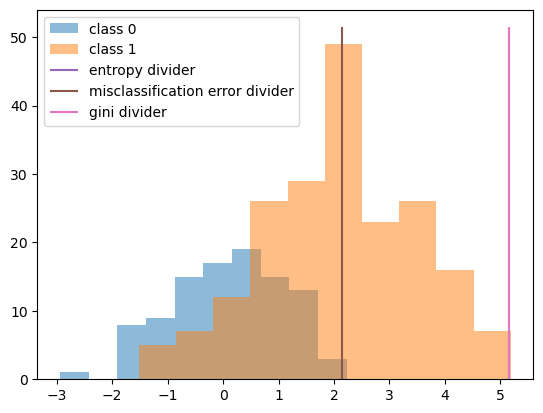

In [79]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

#Sort the points to easily split them
pts_and_labels = sorted(zip(pts, labels))
pts_sorted = [p for p, _ in pts_and_labels]
labels_sorted = [label for _, label in pts_and_labels]


def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))


entropy_res = (1, 0)
misclass_res = (1, 0)
gini_res = (1, 0)

for i in range(1, len(pts_sorted)):
    entropy_curr = compute_split_measure(labels_sorted, labels_sorted[:i], labels_sorted[i:], entropy)
    if(entropy_curr < entropy_res[0]):
        entropy_res = (entropy_curr, i)

    misclass_curr = compute_split_measure(labels_sorted, labels_sorted[:i], labels_sorted[i:], misclassification_error)
    if(misclass_curr < misclass_res[0]):
        misclass_res = (misclass_curr, i)
    
    gini_curr = compute_split_measure(labels_sorted, labels_sorted[:i], labels_sorted[i:], gini_impurity)
    if(gini_curr < gini_res[0]):
        gini_res = (gini_curr, i)

print(f'Entropy split results: x = {pts_sorted[entropy_res[1] - 1]}')
print(f'Miscalssification error split results: x = {pts_sorted[misclass_res[1] - 1]}')
print(f'Gini impurity split results: x = {pts_sorted[gini_res[1] - 1]}')

fig, ax = plt.subplots()

ax.hist(pts_class0, alpha=0.5, label='class 0')
ax.hist(pts_class1, alpha=0.5, label='class 1')
ymin, ymax = ax.get_ylim()
ax.vlines([pts_sorted[entropy_res[1] - 1]], ymin=ymin, ymax=ymax, color='C4', label="entropy divider")
ax.vlines([pts_sorted[misclass_res[1] - 1]], ymin=ymin, ymax=ymax, color='C5', label="misclassification error divider")
ax.vlines([pts_sorted[gini_res[1] - 1]], ymin=ymin, ymax=ymax, color='C6', label="gini divider")
ax.legend()



plt.show()



# TODO: Then, Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

### (c)

In [81]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

indices = list(range(len(labels)))
random.shuffle(indices)

features = features[:, indices]
labels = labels[indices]

features_test = features[:, :200]
labels_test = labels[:200]

features_val = features[:, 200:400]
labels_val = labels[200:400]

features_train = features[:, 400:]
labels_train = labels[400:]

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_accuracy = 0.
best_params = {'tree_num': -1, 'split_crit': -1, 'tree_depth': -1}
for tree_num in [5, 10, 20, 100]:
    for split_crit in ['gini', 'entropy']:
        for tree_depth in [2, 5, 10, None]:
            clf = RandomForestClassifier(n_estimators=tree_num, max_depth=tree_depth, criterion=split_crit)
            clf.fit(features_train.T, labels_train)
            labels_predicted = clf.predict(features_val.T)
            a = accuracy_score(labels_val, labels_predicted)
            if(a > best_accuracy):
                best_accuracy = a
                best_params['tree_num'] = tree_num
                best_params['split_crit'] = split_crit
                best_params['tree_depth'] = tree_depth

print('Best training result')
print(f'Accuracy: {best_accuracy}')
print(f'Parameters:\n number of trees: {best_params["tree_num"]}, split criterion: {best_params["split_crit"]}, depth: {best_params["tree_depth"] if best_params["tree_depth"] is not None else "pure"}')

# TODO: train a random forest classifier for each combination of specified hyperparameters 
#       and evaluate the performances on the validation set.

Best training result
Accuracy: 0.81
Parameters:
 number of trees: 100, split criterion: gini, depth: 10


In [9]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set